# 중구 '명동거리' - 일반의류 모델링

In [145]:
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 폰트 설정 방법 2
import matplotlib as plt
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error

## 1. 데이터 불러오기

In [146]:
# 전처리 된 일반의류 데이터

df = pd.read_csv('./myungdong_cloth_after.csv', encoding = 'cp949')

In [147]:
# 결과 확인

df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,서비스_업종_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,0,2015,1,CS300011,1.00,1.00,0.50,0.90,4,0.82,...,0.78,0.74,0.75,0.73,0.80,0.75,0.73,0.67,0.73,0.39
1,1,2015,2,CS300011,0.96,0.96,0.50,0.60,2,0.33,...,0.90,0.92,0.89,0.90,0.80,0.89,0.97,0.85,0.91,0.57
2,2,2015,3,CS300011,0.86,0.86,0.50,0.70,3,0.70,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.67
3,3,2015,4,CS300011,0.84,0.84,0.50,0.70,2,0.33,...,0.70,0.76,0.71,0.69,0.87,0.69,0.66,0.74,0.69,0.42
4,4,2016,1,CS300011,0.75,0.75,0.50,0.70,3,0.64,...,0.64,0.60,0.57,0.63,0.69,0.62,0.57,0.55,0.61,0.42


In [148]:
# 결과 확인

df.shape

(22, 82)

In [149]:
# 결측치 확인

df.isnull().sum()

Unnamed: 0         0
기준_년_코드            0
기준_분기_코드           0
서비스_업종_코드          0
점포_수               0
                  ..
연령대_20_매출_건수       0
연령대_30_매출_건수       0
연령대_40_매출_건수       0
연령대_50_매출_건수       0
연령대_60_이상_매출_건수    0
Length: 82, dtype: int64

In [150]:
# 전체 결측치 확인

all_null = df.isnull().sum()
all_null.sum()

0

In [151]:
# 모든 column 출력

df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '서비스_업종_코드', '점포_수', '유사_업종_점포_수',
       '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수', '당월_매출_금액',
       '당월_매출_건수', '주중_매출_비율', '주말_매출_비율', '월요일_매출_비율', '화요일_매출_비율',
       '수요일_매출_비율', '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율',
       '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
       '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율', '남성_매출_비율',
       '여성_매출_비율', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율',
       '연령대_40_매출_비율', '연령대_50_매출_비율', '연령대_60_이상_매출_비율', '주중_매출_금액',
       '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액',
       '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
       '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액',
       '시간대_17~21_매출_금액', '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액',
       '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액',
       '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', '주말_매출_건수', '월요일_매출_건수',
       '화요일_매

In [152]:
# 불필요한 column 삭제

useless = ['Unnamed: 0', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_점포_수', '프랜차이즈_점포_수', 
           '당월_매출_건수', '주중_매출_금액', '주말_매출_금액', '월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', 
           '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액', '시간대_00~06_매출_금액',
           '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액','시간대_17~21_매출_금액', 
           '시간대_21~24_매출_금액', '남성_매출_금액', '여성_매출_금액', '연령대_10_매출_금액', '연령대_20_매출_금액', 
           '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', '주중_매출_건수', 
           '주말_매출_건수', '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', 
           '토요일_매출_건수', '일요일_매출_건수', '시간대_건수~06_매출_건수', '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수',
           '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_건수~24_매출_건수', '남성_매출_건수',
           '여성_매출_건수', '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수',
           '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

df_new = df.drop(useless, axis = 1)

In [153]:
# 결과 확인

df_new

,기준_년_코드,기준_분기_코드,서비스_업종_코드,폐업_률,당월_매출_금액,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,...,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,2015,1,CS300011,4,1.00,0.17,0.83,0.00,0.20,1.00,...,1.00,0.86,0.75,0.23,1.00,0.92,0.50,0.20,0.25,0.29
1,2015,2,CS300011,2,0.96,0.00,1.00,0.25,0.40,0.50,...,0.83,1.00,0.67,0.31,0.75,0.69,0.83,0.60,0.12,0.29
2,2015,3,CS300011,3,0.98,0.83,0.17,0.25,0.40,1.00,...,0.50,0.86,0.92,0.08,0.75,0.77,1.00,0.40,0.25,0.00
3,2015,4,CS300011,2,1.00,0.33,0.67,0.25,0.20,0.50,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
4,2016,1,CS300011,3,0.80,0.17,0.83,0.25,0.40,0.50,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
5,2016,2,CS300011,1,0.64,0.17,1.00,0.25,0.00,0.00,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
6,2016,3,CS300011,4,0.57,0.67,0.50,1.00,0.20,0.50,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
7,2016,4,CS300011,2,0.63,0.17,0.83,0.25,0.20,0.00,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
8,2017,1,CS300011,5,0.48,0.50,0.50,0.25,0.40,0.50,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
9,2017,2,CS300011,3,0.63,0.33,0.83,0.25,0.20,1.00,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86


## 2. 모델링 데이터 준비
### (1) 시계열 인풋데이터 만들기

In [154]:
def four_season_data_in(all_data_in,y_1,q_1,y_2,q_2,y_3,q_3,y_4,q_4):

    _test = pd.merge(all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_1,q_1)).drop(['기준_년_코드','기준_분기_코드'], axis=1),
                     all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_2,q_2)).drop(['기준_년_코드','기준_분기_코드'], axis=1), how='left',on=['서비스_업종_코드'],suffixes=('-4', '-3'))
    _test = pd.merge(_test,all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_3,q_3)).drop(['기준_년_코드','기준_분기_코드'], axis=1), how='left',on=['서비스_업종_코드'],suffixes=('', '-2'))
    _test = pd.merge(_test,all_data_in.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_4,q_4)).drop(['기준_년_코드','기준_분기_코드'], axis=1), how='left',on=['서비스_업종_코드'],suffixes=('', '-1'))
    return _test

In [155]:
# 예측을 위한 인풋 데이터 생성

x_predict_2020_3 = four_season_data_in(df_new.drop('폐업_률', axis = 1),2019,3,2019,4,2020,1,2020,2)
x_predict_2020_3 = x_predict_2020_3.drop('서비스_업종_코드', axis = 1)
x_predict_2020_3

,당월_매출_금액-4,주중_매출_비율-4,주말_매출_비율-4,월요일_매출_비율-4,화요일_매출_비율-4,수요일_매출_비율-4,목요일_매출_비율-4,금요일_매출_비율-4,토요일_매출_비율-4,일요일_매출_비율-4,...,시간대_17~21_매출_비율-1,시간대_21~24_매출_비율-1,남성_매출_비율-1,여성_매출_비율-1,연령대_10_매출_비율-1,연령대_20_매출_비율-1,연령대_30_매출_비율-1,연령대_40_매출_비율-1,연령대_50_매출_비율-1,연령대_60_이상_매출_비율-1
0,0.26,1.00,0.00,0.75,0.60,1.00,0.25,0.25,0.00,0.33,...,0.83,0.00,0.50,0.46,0.00,0.00,0.67,0.80,1.00,0.86


### (2) 시계열 아웃풋데이터 만들기

In [156]:
def four_season_data_out(all_data_c,y_5,q_5):
    
    _test = pd.DataFrame(all_data_c.groupby(['기준_년_코드','기준_분기_코드']).get_group((y_5,q_5))['폐업_률'])
    
    return _test

In [157]:
y_predict_2020_2 = four_season_data_out(df_new,2020,2)
y_predict_2020_2

,폐업_률
20,0


### (3) 시계열 데이터 합치기

In [158]:
list_season = []
for i in range(2015,2020):
    
    for j in range(1,5):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)
        
for i in range(2020,2021):
    
    for j in range(1,3):
        _list = []
        _list.append(i)
        _list.append(j)
        list_season.append(_list)        

print(list_season)

[[2015, 1], [2015, 2], [2015, 3], [2015, 4], [2016, 1], [2016, 2], [2016, 3], [2016, 4], [2017, 1], [2017, 2], [2017, 3], [2017, 4], [2018, 1], [2018, 2], [2018, 3], [2018, 4], [2019, 1], [2019, 2], [2019, 3], [2019, 4], [2020, 1], [2020, 2]]


In [159]:
for i in range(0,18):
    # print(i)
    globals()["x_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])] = four_season_data_in(df_new.drop('폐업_률', axis = 1),
                                                                                                                  list_season[i][0],list_season[i][1],
                                                                                                                  list_season[i+1][0],list_season[i+1][1],
                                                                                                                  list_season[i+2][0],list_season[i+2][1],
                                                                                                                  list_season[i+3][0],list_season[i+3][1]
                                                                                                              )
    globals()["y_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])] = four_season_data_out(df_new,
                                                                                                                 list_season[i+4][0],list_season[i+4][1])

In [160]:
x_out

0      97
1      99
2      96
3      98
4      95
5      97
6      98
7      98
8      97
9      99
10     97
11     98
12     98
13     98
14     98
15     99
16     98
17    100
Name: 폐업_률, dtype: int64

In [161]:
# df 를 vertically concat 하기 위해 append 함

x_in = pd.DataFrame(columns = x_predict_2020_2.columns)
x_out = pd.DataFrame(columns = y_predict_2020_2.columns)
for i in range(0, 18):
    x_in = x_in.append(globals()["x_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])], ignore_index=False)
    x_out = x_out.append(globals()["y_predict_{}_{}".format(list_season[i+4][0], list_season[i+4][1])], ignore_index=False)
x_in = x_in.drop(['서비스_업종_코드'], axis=1)
x_in = x_in.reset_index(drop=True, inplace=False)
x_in

,당월_매출_금액-4,주중_매출_비율-4,주말_매출_비율-4,월요일_매출_비율-4,화요일_매출_비율-4,수요일_매출_비율-4,목요일_매출_비율-4,금요일_매출_비율-4,토요일_매출_비율-4,일요일_매출_비율-4,...,시간대_17~21_매출_비율-1,시간대_21~24_매출_비율-1,남성_매출_비율-1,여성_매출_비율-1,연령대_10_매출_비율-1,연령대_20_매출_비율-1,연령대_30_매출_비율-1,연령대_40_매출_비율-1,연령대_50_매출_비율-1,연령대_60_이상_매출_비율-1
0,1.00,0.17,0.83,0.00,0.20,1.00,0.00,1.00,0.40,0.67,...,0.50,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14
1,0.96,0.00,1.00,0.25,0.40,0.50,0.25,0.25,1.00,0.33,...,0.50,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43
2,0.98,0.83,0.17,0.25,0.40,1.00,0.75,0.25,0.20,0.33,...,0.50,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43
3,1.00,0.33,0.67,0.25,0.20,0.50,0.75,0.50,0.40,0.67,...,0.33,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71
4,0.80,0.17,0.83,0.25,0.40,0.50,0.25,0.25,0.60,0.67,...,0.17,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29
5,0.64,0.17,1.00,0.25,0.00,0.00,0.50,0.50,0.60,1.00,...,0.33,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71
6,0.57,0.67,0.50,1.00,0.20,0.50,0.25,0.75,0.20,0.67,...,0.00,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86
7,0.63,0.17,0.83,0.25,0.20,0.00,1.00,0.00,0.60,0.67,...,0.50,1.00,0.42,0.54,0.50,0.62,0.33,0.40,0.62,0.57
8,0.48,0.50,0.50,0.25,0.40,0.50,0.50,0.50,0.00,1.00,...,0.50,0.86,0.25,0.69,0.75,0.69,0.17,0.60,0.38,0.57
9,0.63,0.33,0.83,0.25,0.20,1.00,0.50,0.25,0.40,1.00,...,0.67,0.71,0.33,0.62,0.75,1.00,0.00,0.00,0.38,0.57


In [162]:
x_out = x_out.reset_index(drop = True)
x_out

,폐업_률
0,3
1,1
2,4
3,2
4,5
5,3
6,2
7,2
8,3
9,1


In [163]:
x_out['폐업_률'] = pd.to_numeric(x_out['폐업_률'])
x_out

,폐업_률
0,3
1,1
2,4
3,2
4,5
5,3
6,2
7,2
8,3
9,1


In [164]:
x = pd.concat([x_in,x_out], axis=1)
x

,당월_매출_금액-4,주중_매출_비율-4,주말_매출_비율-4,월요일_매출_비율-4,화요일_매출_비율-4,수요일_매출_비율-4,목요일_매출_비율-4,금요일_매출_비율-4,토요일_매출_비율-4,일요일_매출_비율-4,...,시간대_21~24_매출_비율-1,남성_매출_비율-1,여성_매출_비율-1,연령대_10_매출_비율-1,연령대_20_매출_비율-1,연령대_30_매출_비율-1,연령대_40_매출_비율-1,연령대_50_매출_비율-1,연령대_60_이상_매출_비율-1,폐업_률
0,1.00,0.17,0.83,0.00,0.20,1.00,0.00,1.00,0.40,0.67,...,0.86,1.00,0.00,1.00,0.85,0.50,0.60,0.00,0.14,3
1,0.96,0.00,1.00,0.25,0.40,0.50,0.25,0.25,1.00,0.33,...,0.71,0.75,0.23,1.00,0.77,0.50,0.40,0.12,0.43,1
2,0.98,0.83,0.17,0.25,0.40,1.00,0.75,0.25,0.20,0.33,...,0.86,0.67,0.31,0.75,0.69,0.50,0.40,0.50,0.43,4
3,1.00,0.33,0.67,0.25,0.20,0.50,0.75,0.50,0.40,0.67,...,1.00,0.25,0.69,0.75,0.85,0.17,0.00,0.25,0.71,2
4,0.80,0.17,0.83,0.25,0.40,0.50,0.25,0.25,0.60,0.67,...,1.00,0.33,0.62,0.75,0.77,0.50,0.40,0.38,0.29,5
5,0.64,0.17,1.00,0.25,0.00,0.00,0.50,0.50,0.60,1.00,...,0.71,0.33,0.62,0.75,0.62,0.50,0.20,0.38,0.71,3
6,0.57,0.67,0.50,1.00,0.20,0.50,0.25,0.75,0.20,0.67,...,0.71,0.33,0.62,0.50,0.54,0.50,0.40,0.38,0.86,2
7,0.63,0.17,0.83,0.25,0.20,0.00,1.00,0.00,0.60,0.67,...,1.00,0.42,0.54,0.50,0.62,0.33,0.40,0.62,0.57,2
8,0.48,0.50,0.50,0.25,0.40,0.50,0.50,0.50,0.00,1.00,...,0.86,0.25,0.69,0.75,0.69,0.17,0.60,0.38,0.57,3
9,0.63,0.33,0.83,0.25,0.20,1.00,0.50,0.25,0.40,1.00,...,0.71,0.33,0.62,0.75,1.00,0.00,0.00,0.38,0.57,1


## 3. 모델링 - XGBoost
### (1) 모델링

In [165]:
import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
start = time.time()  # 시작 시간 저장
from sklearn.metrics import accuracy_score

# train, test 데이터 분할

X_train, X_test, y_train, y_test= train_test_split(x_in, x_out, test_size=0.2, random_state=42)

In [166]:
# xgboost 학습

model = XGBRegressor(booster="gbtree", objective ='reg:squarederror', n_estimators=1500, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1,subsample=0.75, reg_lambda=1, colsample_bytree=1, gamma=0, )

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train, eval_set=eval_set, verbose=True)

pred_y = model.predict(X_test)

#predictions = [round(value) for value in xgb_5000_명동_pred ]
# evaluate predictions

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0]	validation_0-rmse:2.17742
[1]	validation_0-rmse:2.17541
[2]	validation_0-rmse:2.17390
[3]	validation_0-rmse:2.17248
[4]	validation_0-rmse:2.17044
[5]	validation_0-rmse:2.16902
[6]	validation_0-rmse:2.16720
[7]	validation_0-rmse:2.16517
[8]	validation_0-rmse:2.16357
[9]	validation_0-rmse:2.16192
[10]	validation_0-rmse:2.16027
[11]	validation_0-rmse:2.15826
[12]	validation_0-rmse:2.15625
[13]	validation_0-rmse:2.15422
[14]	validation_0-rmse:2.15273
[15]	validation_0-rmse:2.15120
[16]	validation_0-rmse:2.14919
[17]	validation_0-rmse:2.14719
[18]	validation_0-rmse:2.14577
[19]	validation_0-rmse:2.14436
[20]	validation_0-rmse:2.14284
[21]	validation_0-rmse:2.14127
[22]	validation_0-rmse:2.13925
[23]	validation_0-rmse:2.13796
[24]	validation_0-rmse:2.13617
[25]	validation_0-rmse:2.13456
[26]	validation_0-rmse:2.13307
[27]	validation_0-rmse:2.13108
[28]	validation_0-rmse:2.12929
[29]	validation_0-rmse:2.12740
[30]	validation_0-rmse:2.12629
[31]	validation_0-rmse:2.12431
[32]	validation_0-

[260]	validation_0-rmse:1.78994
[261]	validation_0-rmse:1.78909
[262]	validation_0-rmse:1.78808
[263]	validation_0-rmse:1.78651
[264]	validation_0-rmse:1.78496
[265]	validation_0-rmse:1.78340
[266]	validation_0-rmse:1.78257
[267]	validation_0-rmse:1.78157
[268]	validation_0-rmse:1.78042
[269]	validation_0-rmse:1.77912
[270]	validation_0-rmse:1.77757
[271]	validation_0-rmse:1.77644
[272]	validation_0-rmse:1.77489
[273]	validation_0-rmse:1.77334
[274]	validation_0-rmse:1.77179
[275]	validation_0-rmse:1.77094
[276]	validation_0-rmse:1.76941
[277]	validation_0-rmse:1.76852
[278]	validation_0-rmse:1.76699
[279]	validation_0-rmse:1.76602
[280]	validation_0-rmse:1.76490
[281]	validation_0-rmse:1.76394
[282]	validation_0-rmse:1.76240
[283]	validation_0-rmse:1.76130
[284]	validation_0-rmse:1.76034
[285]	validation_0-rmse:1.75882
[286]	validation_0-rmse:1.75729
[287]	validation_0-rmse:1.75578
[288]	validation_0-rmse:1.75426
[289]	validation_0-rmse:1.75274
[290]	validation_0-rmse:1.75185
[291]	va

[517]	validation_0-rmse:1.49785
[518]	validation_0-rmse:1.49672
[519]	validation_0-rmse:1.49558
[520]	validation_0-rmse:1.49474
[521]	validation_0-rmse:1.49361
[522]	validation_0-rmse:1.49284
[523]	validation_0-rmse:1.49220
[524]	validation_0-rmse:1.49107
[525]	validation_0-rmse:1.49037
[526]	validation_0-rmse:1.48960
[527]	validation_0-rmse:1.48847
[528]	validation_0-rmse:1.48766
[529]	validation_0-rmse:1.48655
[530]	validation_0-rmse:1.48538
[531]	validation_0-rmse:1.48428
[532]	validation_0-rmse:1.48341
[533]	validation_0-rmse:1.48230
[534]	validation_0-rmse:1.48121
[535]	validation_0-rmse:1.48009
[536]	validation_0-rmse:1.47898
[537]	validation_0-rmse:1.47788
[538]	validation_0-rmse:1.47694
[539]	validation_0-rmse:1.47651
[540]	validation_0-rmse:1.47542
[541]	validation_0-rmse:1.47432
[542]	validation_0-rmse:1.47322
[543]	validation_0-rmse:1.47242
[544]	validation_0-rmse:1.47133
[545]	validation_0-rmse:1.47033
[546]	validation_0-rmse:1.46949
[547]	validation_0-rmse:1.46868
[548]	va

[774]	validation_0-rmse:1.29209
[775]	validation_0-rmse:1.29136
[776]	validation_0-rmse:1.29081
[777]	validation_0-rmse:1.29008
[778]	validation_0-rmse:1.28957
[779]	validation_0-rmse:1.28885
[780]	validation_0-rmse:1.28832
[781]	validation_0-rmse:1.28759
[782]	validation_0-rmse:1.28703
[783]	validation_0-rmse:1.28642
[784]	validation_0-rmse:1.28587
[785]	validation_0-rmse:1.28511
[786]	validation_0-rmse:1.28445
[787]	validation_0-rmse:1.28373
[788]	validation_0-rmse:1.28317
[789]	validation_0-rmse:1.28280
[790]	validation_0-rmse:1.28226
[791]	validation_0-rmse:1.28195
[792]	validation_0-rmse:1.28123
[793]	validation_0-rmse:1.28048
[794]	validation_0-rmse:1.27984
[795]	validation_0-rmse:1.27914
[796]	validation_0-rmse:1.27845
[797]	validation_0-rmse:1.27774
[798]	validation_0-rmse:1.27709
[799]	validation_0-rmse:1.27635
[800]	validation_0-rmse:1.27579
[801]	validation_0-rmse:1.27485
[802]	validation_0-rmse:1.27431
[803]	validation_0-rmse:1.27375
[804]	validation_0-rmse:1.27320
[805]	va

[1030]	validation_0-rmse:1.17735
[1031]	validation_0-rmse:1.17708
[1032]	validation_0-rmse:1.17683
[1033]	validation_0-rmse:1.17642
[1034]	validation_0-rmse:1.17618
[1035]	validation_0-rmse:1.17578
[1036]	validation_0-rmse:1.17535
[1037]	validation_0-rmse:1.17512
[1038]	validation_0-rmse:1.17475
[1039]	validation_0-rmse:1.17452
[1040]	validation_0-rmse:1.17430
[1041]	validation_0-rmse:1.17417
[1042]	validation_0-rmse:1.17392
[1043]	validation_0-rmse:1.17369
[1044]	validation_0-rmse:1.17328
[1045]	validation_0-rmse:1.17308
[1046]	validation_0-rmse:1.17272
[1047]	validation_0-rmse:1.17283
[1048]	validation_0-rmse:1.17254
[1049]	validation_0-rmse:1.17233
[1050]	validation_0-rmse:1.17210
[1051]	validation_0-rmse:1.17189
[1052]	validation_0-rmse:1.17175
[1053]	validation_0-rmse:1.17163
[1054]	validation_0-rmse:1.17143
[1055]	validation_0-rmse:1.17122
[1056]	validation_0-rmse:1.17101
[1057]	validation_0-rmse:1.17066
[1058]	validation_0-rmse:1.17029
[1059]	validation_0-rmse:1.17008
[1060]	val

[1279]	validation_0-rmse:1.13524
[1280]	validation_0-rmse:1.13508
[1281]	validation_0-rmse:1.13507
[1282]	validation_0-rmse:1.13506
[1283]	validation_0-rmse:1.13492
[1284]	validation_0-rmse:1.13479
[1285]	validation_0-rmse:1.13465
[1286]	validation_0-rmse:1.13428
[1287]	validation_0-rmse:1.13429
[1288]	validation_0-rmse:1.13428
[1289]	validation_0-rmse:1.13416
[1290]	validation_0-rmse:1.13403
[1291]	validation_0-rmse:1.13403
[1292]	validation_0-rmse:1.13389
[1293]	validation_0-rmse:1.13354
[1294]	validation_0-rmse:1.13330
[1295]	validation_0-rmse:1.13332
[1296]	validation_0-rmse:1.13316
[1297]	validation_0-rmse:1.13316
[1298]	validation_0-rmse:1.13316
[1299]	validation_0-rmse:1.13314
[1300]	validation_0-rmse:1.13303
[1301]	validation_0-rmse:1.13304
[1302]	validation_0-rmse:1.13294
[1303]	validation_0-rmse:1.13309
[1304]	validation_0-rmse:1.13310
[1305]	validation_0-rmse:1.13316
[1306]	validation_0-rmse:1.13317
[1307]	validation_0-rmse:1.13329
[1308]	validation_0-rmse:1.13331
[1309]	val

### (2) 모델 성능 시각화

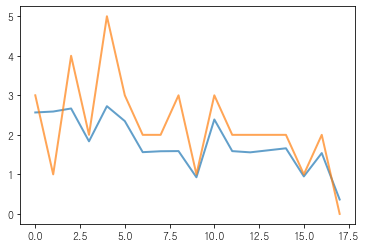

In [167]:
# 모델 성능 시각화

plt.pyplot.plot(model.predict(x_in),alpha = 0.7,linewidth = 2)
# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분
plt.pyplot.plot(x_out.values,alpha = 0.7,linewidth = 2)

### (3) Feature Importance

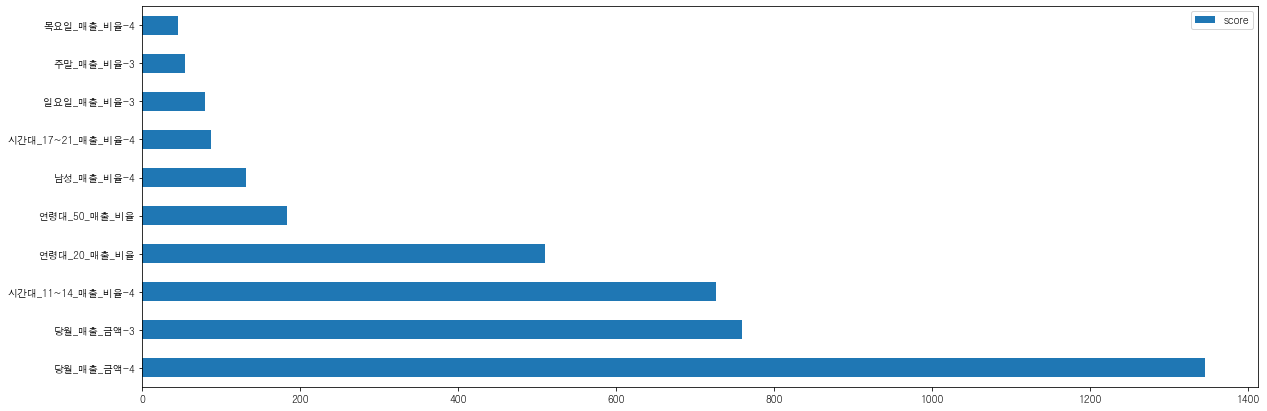

In [168]:
# 중요도 시각화

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh')

In [169]:
model.predict(x_predict_2020_3)

array([1.2204394], dtype=float32)

## 4. 생존율 관점에서 분석하기
### (1) 모델링

In [202]:
# 폐업률을 생존율로 변환

total = 100
x_out = total - x_out
x_out

0     3
1     1
2     4
3     2
4     5
5     3
6     2
7     2
8     3
9     1
10    3
11    2
12    2
13    2
14    2
15    1
16    2
17    0
Name: 폐업_률, dtype: int64

In [171]:
import time
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
start = time.time()  # 시작 시간 저장
from sklearn.metrics import accuracy_score

# train, test 데이터 
X_train, X_test, y_train, y_test= train_test_split(x_in, x_out, test_size=0.2, random_state=42)

In [172]:
# xgboost 학습

model = XGBRegressor(booster="gbtree", objective ='reg:squarederror', n_estimators=12000, learning_rate=0.001 ,
                      max_depth=12, n_jobs = -1,subsample=0.75, reg_lambda=1, colsample_bytree=1, gamma=0, )

eval_set = [(X_test, y_test)]

model.fit(X_train,y_train, eval_set=eval_set, verbose=True)

pred_y = model.predict(X_test)

#predictions = [round(value) for value in xgb_5000_명동_pred ]
# evaluate predictions

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[0]	validation_0-rmse:96.91569
[1]	validation_0-rmse:96.82740
[2]	validation_0-rmse:96.73749
[3]	validation_0-rmse:96.64829
[4]	validation_0-rmse:96.56024
[5]	validation_0-rmse:96.47300
[6]	validation_0-rmse:96.38365
[7]	validation_0-rmse:96.29666
[8]	validation_0-rmse:96.20732
[9]	validation_0-rmse:96.11885
[10]	validation_0-rmse:96.03200
[11]	validation_0-rmse:95.94327
[12]	validation_0-rmse:95.85442
[13]	validation_0-rmse:95.76627
[14]	validation_0-rmse:95.67803
[15]	validation_0-rmse:95.59051
[16]	validation_0-rmse:95.50158
[17]	validation_0-rmse:95.41212
[18]	validation_0-rmse:95.32676
[19]	validation_0-rmse:95.24304
[20]	validation_0-rmse:95.15816
[21]	validation_0-rmse:95.07336
[22]	validation_0-rmse:94.98470
[23]	validation_0-rmse:94.89867
[24]	validation_0-rmse:94.81139
[25]	validation_0-rmse:94.72494
[26]	validation_0-rmse:94.63944
[27]	validation_0-rmse:94.55138
[28]	validation_0-rmse:94.46328
[29]	validation_0-rmse:94.37832
[30]	validation_0-rmse:94.29398
[31]	validation_0-

[252]	validation_0-rmse:76.97649
[253]	validation_0-rmse:76.90556
[254]	validation_0-rmse:76.83493
[255]	validation_0-rmse:76.76563
[256]	validation_0-rmse:76.69366
[257]	validation_0-rmse:76.62367
[258]	validation_0-rmse:76.55502
[259]	validation_0-rmse:76.48587
[260]	validation_0-rmse:76.41454
[261]	validation_0-rmse:76.34618
[262]	validation_0-rmse:76.27651
[263]	validation_0-rmse:76.20538
[264]	validation_0-rmse:76.13523
[265]	validation_0-rmse:76.06467
[266]	validation_0-rmse:75.99497
[267]	validation_0-rmse:75.92544
[268]	validation_0-rmse:75.85483
[269]	validation_0-rmse:75.78866
[270]	validation_0-rmse:75.71796
[271]	validation_0-rmse:75.64810
[272]	validation_0-rmse:75.57805
[273]	validation_0-rmse:75.50857
[274]	validation_0-rmse:75.43816
[275]	validation_0-rmse:75.36888
[276]	validation_0-rmse:75.30019
[277]	validation_0-rmse:75.23138
[278]	validation_0-rmse:75.16121
[279]	validation_0-rmse:75.09161
[280]	validation_0-rmse:75.02309
[281]	validation_0-rmse:74.95386
[282]	vali

[501]	validation_0-rmse:61.26850
[502]	validation_0-rmse:61.21222
[503]	validation_0-rmse:61.15543
[504]	validation_0-rmse:61.09908
[505]	validation_0-rmse:61.04218
[506]	validation_0-rmse:60.98661
[507]	validation_0-rmse:60.93128
[508]	validation_0-rmse:60.87554
[509]	validation_0-rmse:60.81966
[510]	validation_0-rmse:60.76402
[511]	validation_0-rmse:60.70825
[512]	validation_0-rmse:60.65271
[513]	validation_0-rmse:60.59758
[514]	validation_0-rmse:60.54232
[515]	validation_0-rmse:60.48711
[516]	validation_0-rmse:60.43083
[517]	validation_0-rmse:60.37475
[518]	validation_0-rmse:60.31872
[519]	validation_0-rmse:60.26323
[520]	validation_0-rmse:60.20746
[521]	validation_0-rmse:60.15159
[522]	validation_0-rmse:60.09600
[523]	validation_0-rmse:60.04237
[524]	validation_0-rmse:59.98645
[525]	validation_0-rmse:59.93183
[526]	validation_0-rmse:59.87735
[527]	validation_0-rmse:59.82186
[528]	validation_0-rmse:59.76579
[529]	validation_0-rmse:59.71072
[530]	validation_0-rmse:59.65617
[531]	vali

[750]	validation_0-rmse:48.75269
[751]	validation_0-rmse:48.70773
[752]	validation_0-rmse:48.66271
[753]	validation_0-rmse:48.61946
[754]	validation_0-rmse:48.57470
[755]	validation_0-rmse:48.52941
[756]	validation_0-rmse:48.48520
[757]	validation_0-rmse:48.44086
[758]	validation_0-rmse:48.39565
[759]	validation_0-rmse:48.35175
[760]	validation_0-rmse:48.30674
[761]	validation_0-rmse:48.26193
[762]	validation_0-rmse:48.21681
[763]	validation_0-rmse:48.17272
[764]	validation_0-rmse:48.12849
[765]	validation_0-rmse:48.08418
[766]	validation_0-rmse:48.03957
[767]	validation_0-rmse:47.99493
[768]	validation_0-rmse:47.95184
[769]	validation_0-rmse:47.90729
[770]	validation_0-rmse:47.86330
[771]	validation_0-rmse:47.81898
[772]	validation_0-rmse:47.77503
[773]	validation_0-rmse:47.73079
[774]	validation_0-rmse:47.68923
[775]	validation_0-rmse:47.64571
[776]	validation_0-rmse:47.60229
[777]	validation_0-rmse:47.55814
[778]	validation_0-rmse:47.51437
[779]	validation_0-rmse:47.46994
[780]	vali

[999]	validation_0-rmse:38.78221
[1000]	validation_0-rmse:38.74652
[1001]	validation_0-rmse:38.71095
[1002]	validation_0-rmse:38.67469
[1003]	validation_0-rmse:38.63870
[1004]	validation_0-rmse:38.60342
[1005]	validation_0-rmse:38.56784
[1006]	validation_0-rmse:38.53172
[1007]	validation_0-rmse:38.49621
[1008]	validation_0-rmse:38.46069
[1009]	validation_0-rmse:38.42499
[1010]	validation_0-rmse:38.38916
[1011]	validation_0-rmse:38.35351
[1012]	validation_0-rmse:38.31808
[1013]	validation_0-rmse:38.28250
[1014]	validation_0-rmse:38.24753
[1015]	validation_0-rmse:38.21287
[1016]	validation_0-rmse:38.17690
[1017]	validation_0-rmse:38.14152
[1018]	validation_0-rmse:38.10659
[1019]	validation_0-rmse:38.07147
[1020]	validation_0-rmse:38.03720
[1021]	validation_0-rmse:38.00255
[1022]	validation_0-rmse:37.96696
[1023]	validation_0-rmse:37.93228
[1024]	validation_0-rmse:37.89698
[1025]	validation_0-rmse:37.86500
[1026]	validation_0-rmse:37.83039
[1027]	validation_0-rmse:37.79840
[1028]	validati

[1240]	validation_0-rmse:31.06824
[1241]	validation_0-rmse:31.03909
[1242]	validation_0-rmse:31.01020
[1243]	validation_0-rmse:30.98111
[1244]	validation_0-rmse:30.95260
[1245]	validation_0-rmse:30.92336
[1246]	validation_0-rmse:30.89435
[1247]	validation_0-rmse:30.86622
[1248]	validation_0-rmse:30.83782
[1249]	validation_0-rmse:30.80963
[1250]	validation_0-rmse:30.78101
[1251]	validation_0-rmse:30.75213
[1252]	validation_0-rmse:30.72345
[1253]	validation_0-rmse:30.69469
[1254]	validation_0-rmse:30.66644
[1255]	validation_0-rmse:30.63790
[1256]	validation_0-rmse:30.61042
[1257]	validation_0-rmse:30.58188
[1258]	validation_0-rmse:30.55383
[1259]	validation_0-rmse:30.52547
[1260]	validation_0-rmse:30.49722
[1261]	validation_0-rmse:30.46934
[1262]	validation_0-rmse:30.44169
[1263]	validation_0-rmse:30.41367
[1264]	validation_0-rmse:30.38664
[1265]	validation_0-rmse:30.35852
[1266]	validation_0-rmse:30.33178
[1267]	validation_0-rmse:30.30369
[1268]	validation_0-rmse:30.27556
[1269]	validat

[1481]	validation_0-rmse:24.89179
[1482]	validation_0-rmse:24.86900
[1483]	validation_0-rmse:24.84642
[1484]	validation_0-rmse:24.82368
[1485]	validation_0-rmse:24.80101
[1486]	validation_0-rmse:24.77786
[1487]	validation_0-rmse:24.75563
[1488]	validation_0-rmse:24.73293
[1489]	validation_0-rmse:24.70965
[1490]	validation_0-rmse:24.68686
[1491]	validation_0-rmse:24.66396
[1492]	validation_0-rmse:24.64062
[1493]	validation_0-rmse:24.61816
[1494]	validation_0-rmse:24.59500
[1495]	validation_0-rmse:24.57194
[1496]	validation_0-rmse:24.54927
[1497]	validation_0-rmse:24.52634
[1498]	validation_0-rmse:24.50342
[1499]	validation_0-rmse:24.48060
[1500]	validation_0-rmse:24.45773
[1501]	validation_0-rmse:24.43552
[1502]	validation_0-rmse:24.41270
[1503]	validation_0-rmse:24.38989
[1504]	validation_0-rmse:24.36729
[1505]	validation_0-rmse:24.34444
[1506]	validation_0-rmse:24.32169
[1507]	validation_0-rmse:24.29988
[1508]	validation_0-rmse:24.27736
[1509]	validation_0-rmse:24.25482
[1510]	validat

[1722]	validation_0-rmse:19.92057
[1723]	validation_0-rmse:19.90290
[1724]	validation_0-rmse:19.88477
[1725]	validation_0-rmse:19.86614
[1726]	validation_0-rmse:19.84767
[1727]	validation_0-rmse:19.82916
[1728]	validation_0-rmse:19.81040
[1729]	validation_0-rmse:19.79156
[1730]	validation_0-rmse:19.77291
[1731]	validation_0-rmse:19.75427
[1732]	validation_0-rmse:19.73576
[1733]	validation_0-rmse:19.71704
[1734]	validation_0-rmse:19.69915
[1735]	validation_0-rmse:19.68109
[1736]	validation_0-rmse:19.66280
[1737]	validation_0-rmse:19.64437
[1738]	validation_0-rmse:19.62610
[1739]	validation_0-rmse:19.60773
[1740]	validation_0-rmse:19.58938
[1741]	validation_0-rmse:19.57117
[1742]	validation_0-rmse:19.55304
[1743]	validation_0-rmse:19.53495
[1744]	validation_0-rmse:19.51655
[1745]	validation_0-rmse:19.49912
[1746]	validation_0-rmse:19.48107
[1747]	validation_0-rmse:19.46270
[1748]	validation_0-rmse:19.44446
[1749]	validation_0-rmse:19.42613
[1750]	validation_0-rmse:19.40805
[1751]	validat

[1963]	validation_0-rmse:15.92953
[1964]	validation_0-rmse:15.91460
[1965]	validation_0-rmse:15.89960
[1966]	validation_0-rmse:15.88488
[1967]	validation_0-rmse:15.87078
[1968]	validation_0-rmse:15.85574
[1969]	validation_0-rmse:15.84209
[1970]	validation_0-rmse:15.82719
[1971]	validation_0-rmse:15.81212
[1972]	validation_0-rmse:15.79755
[1973]	validation_0-rmse:15.78363
[1974]	validation_0-rmse:15.76896
[1975]	validation_0-rmse:15.75417
[1976]	validation_0-rmse:15.73948
[1977]	validation_0-rmse:15.72467
[1978]	validation_0-rmse:15.71052
[1979]	validation_0-rmse:15.69591
[1980]	validation_0-rmse:15.68114
[1981]	validation_0-rmse:15.66644
[1982]	validation_0-rmse:15.65162
[1983]	validation_0-rmse:15.63743
[1984]	validation_0-rmse:15.62281
[1985]	validation_0-rmse:15.60811
[1986]	validation_0-rmse:15.59343
[1987]	validation_0-rmse:15.57930
[1988]	validation_0-rmse:15.56463
[1989]	validation_0-rmse:15.55004
[1990]	validation_0-rmse:15.53584
[1991]	validation_0-rmse:15.52195
[1992]	validat

[2204]	validation_0-rmse:12.72920
[2205]	validation_0-rmse:12.71720
[2206]	validation_0-rmse:12.70551
[2207]	validation_0-rmse:12.69374
[2208]	validation_0-rmse:12.68178
[2209]	validation_0-rmse:12.66990
[2210]	validation_0-rmse:12.65780
[2211]	validation_0-rmse:12.64604
[2212]	validation_0-rmse:12.63403
[2213]	validation_0-rmse:12.62241
[2214]	validation_0-rmse:12.61054
[2215]	validation_0-rmse:12.59867
[2216]	validation_0-rmse:12.58681
[2217]	validation_0-rmse:12.57486
[2218]	validation_0-rmse:12.56335
[2219]	validation_0-rmse:12.55141
[2220]	validation_0-rmse:12.53950
[2221]	validation_0-rmse:12.52744
[2222]	validation_0-rmse:12.51547
[2223]	validation_0-rmse:12.50342
[2224]	validation_0-rmse:12.49202
[2225]	validation_0-rmse:12.48029
[2226]	validation_0-rmse:12.46866
[2227]	validation_0-rmse:12.45699
[2228]	validation_0-rmse:12.44499
[2229]	validation_0-rmse:12.43318
[2230]	validation_0-rmse:12.42139
[2231]	validation_0-rmse:12.40976
[2232]	validation_0-rmse:12.39823
[2233]	validat

[2445]	validation_0-rmse:10.16015
[2446]	validation_0-rmse:10.15076
[2447]	validation_0-rmse:10.14164
[2448]	validation_0-rmse:10.13203
[2449]	validation_0-rmse:10.12261
[2450]	validation_0-rmse:10.11311
[2451]	validation_0-rmse:10.10380
[2452]	validation_0-rmse:10.09405
[2453]	validation_0-rmse:10.08426
[2454]	validation_0-rmse:10.07496
[2455]	validation_0-rmse:10.06600
[2456]	validation_0-rmse:10.05640
[2457]	validation_0-rmse:10.04707
[2458]	validation_0-rmse:10.03719
[2459]	validation_0-rmse:10.02776
[2460]	validation_0-rmse:10.01799
[2461]	validation_0-rmse:10.00843
[2462]	validation_0-rmse:9.99954
[2463]	validation_0-rmse:9.99024
[2464]	validation_0-rmse:9.98078
[2465]	validation_0-rmse:9.97155
[2466]	validation_0-rmse:9.96236
[2467]	validation_0-rmse:9.95300
[2468]	validation_0-rmse:9.94341
[2469]	validation_0-rmse:9.93408
[2470]	validation_0-rmse:9.92501
[2471]	validation_0-rmse:9.91560
[2472]	validation_0-rmse:9.90636
[2473]	validation_0-rmse:9.89699
[2474]	validation_0-rmse:9

[2693]	validation_0-rmse:8.04957
[2694]	validation_0-rmse:8.04207
[2695]	validation_0-rmse:8.03489
[2696]	validation_0-rmse:8.02725
[2697]	validation_0-rmse:8.01932
[2698]	validation_0-rmse:8.01164
[2699]	validation_0-rmse:8.00386
[2700]	validation_0-rmse:7.99625
[2701]	validation_0-rmse:7.98872
[2702]	validation_0-rmse:7.98109
[2703]	validation_0-rmse:7.97347
[2704]	validation_0-rmse:7.96589
[2705]	validation_0-rmse:7.95838
[2706]	validation_0-rmse:7.95078
[2707]	validation_0-rmse:7.94320
[2708]	validation_0-rmse:7.93572
[2709]	validation_0-rmse:7.92825
[2710]	validation_0-rmse:7.92095
[2711]	validation_0-rmse:7.91396
[2712]	validation_0-rmse:7.90636
[2713]	validation_0-rmse:7.89922
[2714]	validation_0-rmse:7.89176
[2715]	validation_0-rmse:7.88450
[2716]	validation_0-rmse:7.87677
[2717]	validation_0-rmse:7.86923
[2718]	validation_0-rmse:7.86148
[2719]	validation_0-rmse:7.85463
[2720]	validation_0-rmse:7.84731
[2721]	validation_0-rmse:7.83985
[2722]	validation_0-rmse:7.83246
[2723]	val

[2942]	validation_0-rmse:6.36594
[2943]	validation_0-rmse:6.36008
[2944]	validation_0-rmse:6.35415
[2945]	validation_0-rmse:6.34777
[2946]	validation_0-rmse:6.34192
[2947]	validation_0-rmse:6.33593
[2948]	validation_0-rmse:6.32995
[2949]	validation_0-rmse:6.32367
[2950]	validation_0-rmse:6.31748
[2951]	validation_0-rmse:6.31176
[2952]	validation_0-rmse:6.30551
[2953]	validation_0-rmse:6.29988
[2954]	validation_0-rmse:6.29400
[2955]	validation_0-rmse:6.28819
[2956]	validation_0-rmse:6.28227
[2957]	validation_0-rmse:6.27623
[2958]	validation_0-rmse:6.27005
[2959]	validation_0-rmse:6.26384
[2960]	validation_0-rmse:6.25836
[2961]	validation_0-rmse:6.25219
[2962]	validation_0-rmse:6.24613
[2963]	validation_0-rmse:6.24031
[2964]	validation_0-rmse:6.23436
[2965]	validation_0-rmse:6.22841
[2966]	validation_0-rmse:6.22227
[2967]	validation_0-rmse:6.21653
[2968]	validation_0-rmse:6.21075
[2969]	validation_0-rmse:6.20472
[2970]	validation_0-rmse:6.19887
[2971]	validation_0-rmse:6.19311
[2972]	val

[3191]	validation_0-rmse:5.11053
[3192]	validation_0-rmse:5.10648
[3193]	validation_0-rmse:5.10228
[3194]	validation_0-rmse:5.09953
[3195]	validation_0-rmse:5.09530
[3196]	validation_0-rmse:5.09116
[3197]	validation_0-rmse:5.08841
[3198]	validation_0-rmse:5.08341
[3199]	validation_0-rmse:5.07870
[3200]	validation_0-rmse:5.07444
[3201]	validation_0-rmse:5.07010
[3202]	validation_0-rmse:5.06612
[3203]	validation_0-rmse:5.06120
[3204]	validation_0-rmse:5.05716
[3205]	validation_0-rmse:5.05213
[3206]	validation_0-rmse:5.04807
[3207]	validation_0-rmse:5.04505
[3208]	validation_0-rmse:5.04104
[3209]	validation_0-rmse:5.03649
[3210]	validation_0-rmse:5.03208
[3211]	validation_0-rmse:5.02873
[3212]	validation_0-rmse:5.02473
[3213]	validation_0-rmse:5.02137
[3214]	validation_0-rmse:5.01648
[3215]	validation_0-rmse:5.01315
[3216]	validation_0-rmse:5.00838
[3217]	validation_0-rmse:5.00354
[3218]	validation_0-rmse:5.00022
[3219]	validation_0-rmse:4.99619
[3220]	validation_0-rmse:4.99117
[3221]	val

[3440]	validation_0-rmse:4.23255
[3441]	validation_0-rmse:4.22853
[3442]	validation_0-rmse:4.22644
[3443]	validation_0-rmse:4.22435
[3444]	validation_0-rmse:4.22130
[3445]	validation_0-rmse:4.21922
[3446]	validation_0-rmse:4.21713
[3447]	validation_0-rmse:4.21336
[3448]	validation_0-rmse:4.21020
[3449]	validation_0-rmse:4.20793
[3450]	validation_0-rmse:4.20570
[3451]	validation_0-rmse:4.20176
[3452]	validation_0-rmse:4.19969
[3453]	validation_0-rmse:4.19640
[3454]	validation_0-rmse:4.19389
[3455]	validation_0-rmse:4.18998
[3456]	validation_0-rmse:4.18750
[3457]	validation_0-rmse:4.18382
[3458]	validation_0-rmse:4.18158
[3459]	validation_0-rmse:4.17857
[3460]	validation_0-rmse:4.17638
[3461]	validation_0-rmse:4.17274
[3462]	validation_0-rmse:4.17069
[3463]	validation_0-rmse:4.16815
[3464]	validation_0-rmse:4.16566
[3465]	validation_0-rmse:4.16228
[3466]	validation_0-rmse:4.15836
[3467]	validation_0-rmse:4.15592
[3468]	validation_0-rmse:4.15218
[3469]	validation_0-rmse:4.14837
[3470]	val

[3689]	validation_0-rmse:3.57692
[3690]	validation_0-rmse:3.57448
[3691]	validation_0-rmse:3.57292
[3692]	validation_0-rmse:3.57100
[3693]	validation_0-rmse:3.56842
[3694]	validation_0-rmse:3.56650
[3695]	validation_0-rmse:3.56343
[3696]	validation_0-rmse:3.56191
[3697]	validation_0-rmse:3.55872
[3698]	validation_0-rmse:3.55684
[3699]	validation_0-rmse:3.55382
[3700]	validation_0-rmse:3.55158
[3701]	validation_0-rmse:3.54858
[3702]	validation_0-rmse:3.54547
[3703]	validation_0-rmse:3.54364
[3704]	validation_0-rmse:3.54174
[3705]	validation_0-rmse:3.53889
[3706]	validation_0-rmse:3.53591
[3707]	validation_0-rmse:3.53338
[3708]	validation_0-rmse:3.53043
[3709]	validation_0-rmse:3.52791
[3710]	validation_0-rmse:3.52544
[3711]	validation_0-rmse:3.52395
[3712]	validation_0-rmse:3.52088
[3713]	validation_0-rmse:3.51941
[3714]	validation_0-rmse:3.51754
[3715]	validation_0-rmse:3.51438
[3716]	validation_0-rmse:3.51133
[3717]	validation_0-rmse:3.50947
[3718]	validation_0-rmse:3.50635
[3719]	val

[3938]	validation_0-rmse:3.09778
[3939]	validation_0-rmse:3.09645
[3940]	validation_0-rmse:3.09512
[3941]	validation_0-rmse:3.09314
[3942]	validation_0-rmse:3.09199
[3943]	validation_0-rmse:3.08982
[3944]	validation_0-rmse:3.08720
[3945]	validation_0-rmse:3.08523
[3946]	validation_0-rmse:3.08389
[3947]	validation_0-rmse:3.08257
[3948]	validation_0-rmse:3.08126
[3949]	validation_0-rmse:3.07985
[3950]	validation_0-rmse:3.07790
[3951]	validation_0-rmse:3.07672
[3952]	validation_0-rmse:3.07504
[3953]	validation_0-rmse:3.07375
[3954]	validation_0-rmse:3.07137
[3955]	validation_0-rmse:3.07007
[3956]	validation_0-rmse:3.06757
[3957]	validation_0-rmse:3.06563
[3958]	validation_0-rmse:3.06331
[3959]	validation_0-rmse:3.06083
[3960]	validation_0-rmse:3.05868
[3961]	validation_0-rmse:3.05760
[3962]	validation_0-rmse:3.05529
[3963]	validation_0-rmse:3.05401
[3964]	validation_0-rmse:3.05272
[3965]	validation_0-rmse:3.05144
[3966]	validation_0-rmse:3.05028
[3967]	validation_0-rmse:3.04920
[3968]	val

[4187]	validation_0-rmse:2.75192
[4188]	validation_0-rmse:2.75027
[4189]	validation_0-rmse:2.74858
[4190]	validation_0-rmse:2.74690
[4191]	validation_0-rmse:2.74594
[4192]	validation_0-rmse:2.74494
[4193]	validation_0-rmse:2.74355
[4194]	validation_0-rmse:2.74273
[4195]	validation_0-rmse:2.74192
[4196]	validation_0-rmse:2.74096
[4197]	validation_0-rmse:2.74001
[4198]	validation_0-rmse:2.73921
[4199]	validation_0-rmse:2.73828
[4200]	validation_0-rmse:2.73733
[4201]	validation_0-rmse:2.73545
[4202]	validation_0-rmse:2.73376
[4203]	validation_0-rmse:2.73282
[4204]	validation_0-rmse:2.73144
[4205]	validation_0-rmse:2.73058
[4206]	validation_0-rmse:2.72883
[4207]	validation_0-rmse:2.72789
[4208]	validation_0-rmse:2.72704
[4209]	validation_0-rmse:2.72612
[4210]	validation_0-rmse:2.72534
[4211]	validation_0-rmse:2.72389
[4212]	validation_0-rmse:2.72297
[4213]	validation_0-rmse:2.72218
[4214]	validation_0-rmse:2.72053
[4215]	validation_0-rmse:2.71961
[4216]	validation_0-rmse:2.71815
[4217]	val

[4436]	validation_0-rmse:2.50470
[4437]	validation_0-rmse:2.50408
[4438]	validation_0-rmse:2.50296
[4439]	validation_0-rmse:2.50162
[4440]	validation_0-rmse:2.50094
[4441]	validation_0-rmse:2.49966
[4442]	validation_0-rmse:2.49809
[4443]	validation_0-rmse:2.49676
[4444]	validation_0-rmse:2.49560
[4445]	validation_0-rmse:2.49427
[4446]	validation_0-rmse:2.49294
[4447]	validation_0-rmse:2.49226
[4448]	validation_0-rmse:2.49158
[4449]	validation_0-rmse:2.49101
[4450]	validation_0-rmse:2.49035
[4451]	validation_0-rmse:2.48969
[4452]	validation_0-rmse:2.48908
[4453]	validation_0-rmse:2.48841
[4454]	validation_0-rmse:2.48781
[4455]	validation_0-rmse:2.48714
[4456]	validation_0-rmse:2.48649
[4457]	validation_0-rmse:2.48515
[4458]	validation_0-rmse:2.48449
[4459]	validation_0-rmse:2.48383
[4460]	validation_0-rmse:2.48253
[4461]	validation_0-rmse:2.48155
[4462]	validation_0-rmse:2.48029
[4463]	validation_0-rmse:2.47963
[4464]	validation_0-rmse:2.47893
[4465]	validation_0-rmse:2.47749
[4466]	val

[4685]	validation_0-rmse:2.32075
[4686]	validation_0-rmse:2.32027
[4687]	validation_0-rmse:2.31927
[4688]	validation_0-rmse:2.31884
[4689]	validation_0-rmse:2.31837
[4690]	validation_0-rmse:2.31789
[4691]	validation_0-rmse:2.31718
[4692]	validation_0-rmse:2.31670
[4693]	validation_0-rmse:2.31632
[4694]	validation_0-rmse:2.31521
[4695]	validation_0-rmse:2.31474
[4696]	validation_0-rmse:2.31374
[4697]	validation_0-rmse:2.31331
[4698]	validation_0-rmse:2.31284
[4699]	validation_0-rmse:2.31243
[4700]	validation_0-rmse:2.31196
[4701]	validation_0-rmse:2.31150
[4702]	validation_0-rmse:2.31112
[4703]	validation_0-rmse:2.31038
[4704]	validation_0-rmse:2.30991
[4705]	validation_0-rmse:2.30953
[4706]	validation_0-rmse:2.30906
[4707]	validation_0-rmse:2.30837
[4708]	validation_0-rmse:2.30790
[4709]	validation_0-rmse:2.30693
[4710]	validation_0-rmse:2.30605
[4711]	validation_0-rmse:2.30558
[4712]	validation_0-rmse:2.30512
[4713]	validation_0-rmse:2.30475
[4714]	validation_0-rmse:2.30401
[4715]	val

[4934]	validation_0-rmse:2.16516
[4935]	validation_0-rmse:2.16484
[4936]	validation_0-rmse:2.16452
[4937]	validation_0-rmse:2.16395
[4938]	validation_0-rmse:2.16295
[4939]	validation_0-rmse:2.16263
[4940]	validation_0-rmse:2.16195
[4941]	validation_0-rmse:2.16116
[4942]	validation_0-rmse:2.16054
[4943]	validation_0-rmse:2.15977
[4944]	validation_0-rmse:2.15924
[4945]	validation_0-rmse:2.15893
[4946]	validation_0-rmse:2.15842
[4947]	validation_0-rmse:2.15811
[4948]	validation_0-rmse:2.15699
[4949]	validation_0-rmse:2.15584
[4950]	validation_0-rmse:2.15533
[4951]	validation_0-rmse:2.15502
[4952]	validation_0-rmse:2.15448
[4953]	validation_0-rmse:2.15337
[4954]	validation_0-rmse:2.15226
[4955]	validation_0-rmse:2.15202
[4956]	validation_0-rmse:2.15172
[4957]	validation_0-rmse:2.15136
[4958]	validation_0-rmse:2.15021
[4959]	validation_0-rmse:2.14992
[4960]	validation_0-rmse:2.14881
[4961]	validation_0-rmse:2.14846
[4962]	validation_0-rmse:2.14793
[4963]	validation_0-rmse:2.14683
[4964]	val

[5183]	validation_0-rmse:2.02663
[5184]	validation_0-rmse:2.02629
[5185]	validation_0-rmse:2.02584
[5186]	validation_0-rmse:2.02494
[5187]	validation_0-rmse:2.02482
[5188]	validation_0-rmse:2.02450
[5189]	validation_0-rmse:2.02360
[5190]	validation_0-rmse:2.02314
[5191]	validation_0-rmse:2.02280
[5192]	validation_0-rmse:2.02191
[5193]	validation_0-rmse:2.02158
[5194]	validation_0-rmse:2.02069
[5195]	validation_0-rmse:2.01978
[5196]	validation_0-rmse:2.01949
[5197]	validation_0-rmse:2.01908
[5198]	validation_0-rmse:2.01860
[5199]	validation_0-rmse:2.01772
[5200]	validation_0-rmse:2.01743
[5201]	validation_0-rmse:2.01702
[5202]	validation_0-rmse:2.01613
[5203]	validation_0-rmse:2.01601
[5204]	validation_0-rmse:2.01513
[5205]	validation_0-rmse:2.01502
[5206]	validation_0-rmse:2.01482
[5207]	validation_0-rmse:2.01456
[5208]	validation_0-rmse:2.01399
[5209]	validation_0-rmse:2.01307
[5210]	validation_0-rmse:2.01269
[5211]	validation_0-rmse:2.01231
[5212]	validation_0-rmse:2.01213
[5213]	val

[5432]	validation_0-rmse:1.92543
[5433]	validation_0-rmse:1.92532
[5434]	validation_0-rmse:1.92520
[5435]	validation_0-rmse:1.92448
[5436]	validation_0-rmse:1.92436
[5437]	validation_0-rmse:1.92363
[5438]	validation_0-rmse:1.92333
[5439]	validation_0-rmse:1.92261
[5440]	validation_0-rmse:1.92249
[5441]	validation_0-rmse:1.92215
[5442]	validation_0-rmse:1.92143
[5443]	validation_0-rmse:1.92120
[5444]	validation_0-rmse:1.92108
[5445]	validation_0-rmse:1.92036
[5446]	validation_0-rmse:1.92013
[5447]	validation_0-rmse:1.91941
[5448]	validation_0-rmse:1.91928
[5449]	validation_0-rmse:1.91908
[5450]	validation_0-rmse:1.91876
[5451]	validation_0-rmse:1.91864
[5452]	validation_0-rmse:1.91852
[5453]	validation_0-rmse:1.91827
[5454]	validation_0-rmse:1.91812
[5455]	validation_0-rmse:1.91791
[5456]	validation_0-rmse:1.91776
[5457]	validation_0-rmse:1.91765
[5458]	validation_0-rmse:1.91696
[5459]	validation_0-rmse:1.91677
[5460]	validation_0-rmse:1.91606
[5461]	validation_0-rmse:1.91535
[5462]	val

[5681]	validation_0-rmse:1.84974
[5682]	validation_0-rmse:1.84974
[5683]	validation_0-rmse:1.84974
[5684]	validation_0-rmse:1.84916
[5685]	validation_0-rmse:1.84903
[5686]	validation_0-rmse:1.84875
[5687]	validation_0-rmse:1.84857
[5688]	validation_0-rmse:1.84835
[5689]	validation_0-rmse:1.84816
[5690]	validation_0-rmse:1.84796
[5691]	validation_0-rmse:1.84779
[5692]	validation_0-rmse:1.84773
[5693]	validation_0-rmse:1.84752
[5694]	validation_0-rmse:1.84721
[5695]	validation_0-rmse:1.84663
[5696]	validation_0-rmse:1.84606
[5697]	validation_0-rmse:1.84602
[5698]	validation_0-rmse:1.84545
[5699]	validation_0-rmse:1.84487
[5700]	validation_0-rmse:1.84473
[5701]	validation_0-rmse:1.84467
[5702]	validation_0-rmse:1.84444
[5703]	validation_0-rmse:1.84388
[5704]	validation_0-rmse:1.84382
[5705]	validation_0-rmse:1.84365
[5706]	validation_0-rmse:1.84358
[5707]	validation_0-rmse:1.84353
[5708]	validation_0-rmse:1.84333
[5709]	validation_0-rmse:1.84328
[5710]	validation_0-rmse:1.84303
[5711]	val

[5930]	validation_0-rmse:1.80704
[5931]	validation_0-rmse:1.80689
[5932]	validation_0-rmse:1.80640
[5933]	validation_0-rmse:1.80635
[5934]	validation_0-rmse:1.80631
[5935]	validation_0-rmse:1.80596
[5936]	validation_0-rmse:1.80580
[5937]	validation_0-rmse:1.80577
[5938]	validation_0-rmse:1.80558
[5939]	validation_0-rmse:1.80556
[5940]	validation_0-rmse:1.80552
[5941]	validation_0-rmse:1.80539
[5942]	validation_0-rmse:1.80527
[5943]	validation_0-rmse:1.80524
[5944]	validation_0-rmse:1.80520
[5945]	validation_0-rmse:1.80516
[5946]	validation_0-rmse:1.80469
[5947]	validation_0-rmse:1.80465
[5948]	validation_0-rmse:1.80418
[5949]	validation_0-rmse:1.80409
[5950]	validation_0-rmse:1.80394
[5951]	validation_0-rmse:1.80373
[5952]	validation_0-rmse:1.80326
[5953]	validation_0-rmse:1.80325
[5954]	validation_0-rmse:1.80311
[5955]	validation_0-rmse:1.80263
[5956]	validation_0-rmse:1.80247
[5957]	validation_0-rmse:1.80243
[5958]	validation_0-rmse:1.80197
[5959]	validation_0-rmse:1.80193
[5960]	val

[6179]	validation_0-rmse:1.77471
[6180]	validation_0-rmse:1.77469
[6181]	validation_0-rmse:1.77465
[6182]	validation_0-rmse:1.77464
[6183]	validation_0-rmse:1.77463
[6184]	validation_0-rmse:1.77460
[6185]	validation_0-rmse:1.77458
[6186]	validation_0-rmse:1.77455
[6187]	validation_0-rmse:1.77449
[6188]	validation_0-rmse:1.77446
[6189]	validation_0-rmse:1.77445
[6190]	validation_0-rmse:1.77443
[6191]	validation_0-rmse:1.77428
[6192]	validation_0-rmse:1.77436
[6193]	validation_0-rmse:1.77434
[6194]	validation_0-rmse:1.77432
[6195]	validation_0-rmse:1.77429
[6196]	validation_0-rmse:1.77426
[6197]	validation_0-rmse:1.77388
[6198]	validation_0-rmse:1.77375
[6199]	validation_0-rmse:1.77356
[6200]	validation_0-rmse:1.77353
[6201]	validation_0-rmse:1.77351
[6202]	validation_0-rmse:1.77348
[6203]	validation_0-rmse:1.77350
[6204]	validation_0-rmse:1.77348
[6205]	validation_0-rmse:1.77342
[6206]	validation_0-rmse:1.77339
[6207]	validation_0-rmse:1.77328
[6208]	validation_0-rmse:1.77330
[6209]	val

[6428]	validation_0-rmse:1.75743
[6429]	validation_0-rmse:1.75737
[6430]	validation_0-rmse:1.75736
[6431]	validation_0-rmse:1.75732
[6432]	validation_0-rmse:1.75692
[6433]	validation_0-rmse:1.75669
[6434]	validation_0-rmse:1.75640
[6435]	validation_0-rmse:1.75640
[6436]	validation_0-rmse:1.75635
[6437]	validation_0-rmse:1.75636
[6438]	validation_0-rmse:1.75630
[6439]	validation_0-rmse:1.75615
[6440]	validation_0-rmse:1.75615
[6441]	validation_0-rmse:1.75614
[6442]	validation_0-rmse:1.75596
[6443]	validation_0-rmse:1.75590
[6444]	validation_0-rmse:1.75585
[6445]	validation_0-rmse:1.75592
[6446]	validation_0-rmse:1.75582
[6447]	validation_0-rmse:1.75575
[6448]	validation_0-rmse:1.75568
[6449]	validation_0-rmse:1.75574
[6450]	validation_0-rmse:1.75566
[6451]	validation_0-rmse:1.75563
[6452]	validation_0-rmse:1.75559
[6453]	validation_0-rmse:1.75554
[6454]	validation_0-rmse:1.75554
[6455]	validation_0-rmse:1.75522
[6456]	validation_0-rmse:1.75516
[6457]	validation_0-rmse:1.75516
[6458]	val

[6677]	validation_0-rmse:1.73805
[6678]	validation_0-rmse:1.73805
[6679]	validation_0-rmse:1.73805
[6680]	validation_0-rmse:1.73790
[6681]	validation_0-rmse:1.73790
[6682]	validation_0-rmse:1.73789
[6683]	validation_0-rmse:1.73773
[6684]	validation_0-rmse:1.73761
[6685]	validation_0-rmse:1.73758
[6686]	validation_0-rmse:1.73762
[6687]	validation_0-rmse:1.73754
[6688]	validation_0-rmse:1.73754
[6689]	validation_0-rmse:1.73752
[6690]	validation_0-rmse:1.73759
[6691]	validation_0-rmse:1.73756
[6692]	validation_0-rmse:1.73748
[6693]	validation_0-rmse:1.73741
[6694]	validation_0-rmse:1.73731
[6695]	validation_0-rmse:1.73731
[6696]	validation_0-rmse:1.73731
[6697]	validation_0-rmse:1.73704
[6698]	validation_0-rmse:1.73703
[6699]	validation_0-rmse:1.73681
[6700]	validation_0-rmse:1.73674
[6701]	validation_0-rmse:1.73666
[6702]	validation_0-rmse:1.73651
[6703]	validation_0-rmse:1.73653
[6704]	validation_0-rmse:1.73646
[6705]	validation_0-rmse:1.73645
[6706]	validation_0-rmse:1.73635
[6707]	val

[6926]	validation_0-rmse:1.72218
[6927]	validation_0-rmse:1.72225
[6928]	validation_0-rmse:1.72219
[6929]	validation_0-rmse:1.72214
[6930]	validation_0-rmse:1.72214
[6931]	validation_0-rmse:1.72198
[6932]	validation_0-rmse:1.72198
[6933]	validation_0-rmse:1.72183
[6934]	validation_0-rmse:1.72183
[6935]	validation_0-rmse:1.72182
[6936]	validation_0-rmse:1.72183
[6937]	validation_0-rmse:1.72184
[6938]	validation_0-rmse:1.72174
[6939]	validation_0-rmse:1.72166
[6940]	validation_0-rmse:1.72164
[6941]	validation_0-rmse:1.72141
[6942]	validation_0-rmse:1.72141
[6943]	validation_0-rmse:1.72127
[6944]	validation_0-rmse:1.72122
[6945]	validation_0-rmse:1.72105
[6946]	validation_0-rmse:1.72113
[6947]	validation_0-rmse:1.72113
[6948]	validation_0-rmse:1.72112
[6949]	validation_0-rmse:1.72105
[6950]	validation_0-rmse:1.72097
[6951]	validation_0-rmse:1.72091
[6952]	validation_0-rmse:1.72090
[6953]	validation_0-rmse:1.72089
[6954]	validation_0-rmse:1.72083
[6955]	validation_0-rmse:1.72051
[6956]	val

[7175]	validation_0-rmse:1.70817
[7176]	validation_0-rmse:1.70813
[7177]	validation_0-rmse:1.70813
[7178]	validation_0-rmse:1.70808
[7179]	validation_0-rmse:1.70810
[7180]	validation_0-rmse:1.70811
[7181]	validation_0-rmse:1.70805
[7182]	validation_0-rmse:1.70801
[7183]	validation_0-rmse:1.70801
[7184]	validation_0-rmse:1.70802
[7185]	validation_0-rmse:1.70792
[7186]	validation_0-rmse:1.70791
[7187]	validation_0-rmse:1.70793
[7188]	validation_0-rmse:1.70791
[7189]	validation_0-rmse:1.70788
[7190]	validation_0-rmse:1.70778
[7191]	validation_0-rmse:1.70777
[7192]	validation_0-rmse:1.70778
[7193]	validation_0-rmse:1.70776
[7194]	validation_0-rmse:1.70773
[7195]	validation_0-rmse:1.70772
[7196]	validation_0-rmse:1.70770
[7197]	validation_0-rmse:1.70769
[7198]	validation_0-rmse:1.70762
[7199]	validation_0-rmse:1.70758
[7200]	validation_0-rmse:1.70760
[7201]	validation_0-rmse:1.70758
[7202]	validation_0-rmse:1.70738
[7203]	validation_0-rmse:1.70738
[7204]	validation_0-rmse:1.70738
[7205]	val

[7424]	validation_0-rmse:1.70019
[7425]	validation_0-rmse:1.70020
[7426]	validation_0-rmse:1.70023
[7427]	validation_0-rmse:1.70013
[7428]	validation_0-rmse:1.69996
[7429]	validation_0-rmse:1.69998
[7430]	validation_0-rmse:1.69999
[7431]	validation_0-rmse:1.70001
[7432]	validation_0-rmse:1.70002
[7433]	validation_0-rmse:1.69989
[7434]	validation_0-rmse:1.69989
[7435]	validation_0-rmse:1.69985
[7436]	validation_0-rmse:1.69986
[7437]	validation_0-rmse:1.69982
[7438]	validation_0-rmse:1.69982
[7439]	validation_0-rmse:1.69984
[7440]	validation_0-rmse:1.69985
[7441]	validation_0-rmse:1.69984
[7442]	validation_0-rmse:1.69981
[7443]	validation_0-rmse:1.69974
[7444]	validation_0-rmse:1.69975
[7445]	validation_0-rmse:1.69976
[7446]	validation_0-rmse:1.69966
[7447]	validation_0-rmse:1.69949
[7448]	validation_0-rmse:1.69945
[7449]	validation_0-rmse:1.69941
[7450]	validation_0-rmse:1.69943
[7451]	validation_0-rmse:1.69946
[7452]	validation_0-rmse:1.69945
[7453]	validation_0-rmse:1.69945
[7454]	val

[7673]	validation_0-rmse:1.69310
[7674]	validation_0-rmse:1.69311
[7675]	validation_0-rmse:1.69310
[7676]	validation_0-rmse:1.69296
[7677]	validation_0-rmse:1.69296
[7678]	validation_0-rmse:1.69297
[7679]	validation_0-rmse:1.69294
[7680]	validation_0-rmse:1.69284
[7681]	validation_0-rmse:1.69285
[7682]	validation_0-rmse:1.69285
[7683]	validation_0-rmse:1.69267
[7684]	validation_0-rmse:1.69267
[7685]	validation_0-rmse:1.69268
[7686]	validation_0-rmse:1.69269
[7687]	validation_0-rmse:1.69270
[7688]	validation_0-rmse:1.69271
[7689]	validation_0-rmse:1.69264
[7690]	validation_0-rmse:1.69266
[7691]	validation_0-rmse:1.69266
[7692]	validation_0-rmse:1.69268
[7693]	validation_0-rmse:1.69258
[7694]	validation_0-rmse:1.69251
[7695]	validation_0-rmse:1.69251
[7696]	validation_0-rmse:1.69234
[7697]	validation_0-rmse:1.69226
[7698]	validation_0-rmse:1.69223
[7699]	validation_0-rmse:1.69224
[7700]	validation_0-rmse:1.69225
[7701]	validation_0-rmse:1.69213
[7702]	validation_0-rmse:1.69214
[7703]	val

[7922]	validation_0-rmse:1.68478
[7923]	validation_0-rmse:1.68472
[7924]	validation_0-rmse:1.68469
[7925]	validation_0-rmse:1.68471
[7926]	validation_0-rmse:1.68462
[7927]	validation_0-rmse:1.68464
[7928]	validation_0-rmse:1.68463
[7929]	validation_0-rmse:1.68463
[7930]	validation_0-rmse:1.68460
[7931]	validation_0-rmse:1.68462
[7932]	validation_0-rmse:1.68453
[7933]	validation_0-rmse:1.68452
[7934]	validation_0-rmse:1.68450
[7935]	validation_0-rmse:1.68449
[7936]	validation_0-rmse:1.68433
[7937]	validation_0-rmse:1.68426
[7938]	validation_0-rmse:1.68427
[7939]	validation_0-rmse:1.68419
[7940]	validation_0-rmse:1.68420
[7941]	validation_0-rmse:1.68420
[7942]	validation_0-rmse:1.68422
[7943]	validation_0-rmse:1.68419
[7944]	validation_0-rmse:1.68420
[7945]	validation_0-rmse:1.68421
[7946]	validation_0-rmse:1.68412
[7947]	validation_0-rmse:1.68402
[7948]	validation_0-rmse:1.68404
[7949]	validation_0-rmse:1.68397
[7950]	validation_0-rmse:1.68391
[7951]	validation_0-rmse:1.68375
[7952]	val

[8171]	validation_0-rmse:1.67686
[8172]	validation_0-rmse:1.67684
[8173]	validation_0-rmse:1.67684
[8174]	validation_0-rmse:1.67685
[8175]	validation_0-rmse:1.67686
[8176]	validation_0-rmse:1.67687
[8177]	validation_0-rmse:1.67688
[8178]	validation_0-rmse:1.67680
[8179]	validation_0-rmse:1.67681
[8180]	validation_0-rmse:1.67682
[8181]	validation_0-rmse:1.67671
[8182]	validation_0-rmse:1.67663
[8183]	validation_0-rmse:1.67664
[8184]	validation_0-rmse:1.67664
[8185]	validation_0-rmse:1.67663
[8186]	validation_0-rmse:1.67656
[8187]	validation_0-rmse:1.67657
[8188]	validation_0-rmse:1.67656
[8189]	validation_0-rmse:1.67648
[8190]	validation_0-rmse:1.67647
[8191]	validation_0-rmse:1.67647
[8192]	validation_0-rmse:1.67633
[8193]	validation_0-rmse:1.67635
[8194]	validation_0-rmse:1.67637
[8195]	validation_0-rmse:1.67629
[8196]	validation_0-rmse:1.67618
[8197]	validation_0-rmse:1.67620
[8198]	validation_0-rmse:1.67614
[8199]	validation_0-rmse:1.67600
[8200]	validation_0-rmse:1.67588
[8201]	val

[8420]	validation_0-rmse:1.66907
[8421]	validation_0-rmse:1.66911
[8422]	validation_0-rmse:1.66909
[8423]	validation_0-rmse:1.66902
[8424]	validation_0-rmse:1.66902
[8425]	validation_0-rmse:1.66899
[8426]	validation_0-rmse:1.66900
[8427]	validation_0-rmse:1.66893
[8428]	validation_0-rmse:1.66887
[8429]	validation_0-rmse:1.66877
[8430]	validation_0-rmse:1.66864
[8431]	validation_0-rmse:1.66863
[8432]	validation_0-rmse:1.66856
[8433]	validation_0-rmse:1.66844
[8434]	validation_0-rmse:1.66842
[8435]	validation_0-rmse:1.66835
[8436]	validation_0-rmse:1.66828
[8437]	validation_0-rmse:1.66828
[8438]	validation_0-rmse:1.66829
[8439]	validation_0-rmse:1.66822
[8440]	validation_0-rmse:1.66815
[8441]	validation_0-rmse:1.66816
[8442]	validation_0-rmse:1.66815
[8443]	validation_0-rmse:1.66805
[8444]	validation_0-rmse:1.66806
[8445]	validation_0-rmse:1.66804
[8446]	validation_0-rmse:1.66799
[8447]	validation_0-rmse:1.66799
[8448]	validation_0-rmse:1.66799
[8449]	validation_0-rmse:1.66802
[8450]	val

[8669]	validation_0-rmse:1.66216
[8670]	validation_0-rmse:1.66207
[8671]	validation_0-rmse:1.66207
[8672]	validation_0-rmse:1.66209
[8673]	validation_0-rmse:1.66202
[8674]	validation_0-rmse:1.66196
[8675]	validation_0-rmse:1.66189
[8676]	validation_0-rmse:1.66190
[8677]	validation_0-rmse:1.66191
[8678]	validation_0-rmse:1.66180
[8679]	validation_0-rmse:1.66180
[8680]	validation_0-rmse:1.66176
[8681]	validation_0-rmse:1.66172
[8682]	validation_0-rmse:1.66165
[8683]	validation_0-rmse:1.66165
[8684]	validation_0-rmse:1.66159
[8685]	validation_0-rmse:1.66153
[8686]	validation_0-rmse:1.66154
[8687]	validation_0-rmse:1.66156
[8688]	validation_0-rmse:1.66150
[8689]	validation_0-rmse:1.66152
[8690]	validation_0-rmse:1.66152
[8691]	validation_0-rmse:1.66153
[8692]	validation_0-rmse:1.66148
[8693]	validation_0-rmse:1.66149
[8694]	validation_0-rmse:1.66150
[8695]	validation_0-rmse:1.66143
[8696]	validation_0-rmse:1.66143
[8697]	validation_0-rmse:1.66136
[8698]	validation_0-rmse:1.66134
[8699]	val

[8918]	validation_0-rmse:1.65444
[8919]	validation_0-rmse:1.65444
[8920]	validation_0-rmse:1.65444
[8921]	validation_0-rmse:1.65442
[8922]	validation_0-rmse:1.65442
[8923]	validation_0-rmse:1.65443
[8924]	validation_0-rmse:1.65442
[8925]	validation_0-rmse:1.65437
[8926]	validation_0-rmse:1.65437
[8927]	validation_0-rmse:1.65437
[8928]	validation_0-rmse:1.65436
[8929]	validation_0-rmse:1.65430
[8930]	validation_0-rmse:1.65424
[8931]	validation_0-rmse:1.65415
[8932]	validation_0-rmse:1.65409
[8933]	validation_0-rmse:1.65402
[8934]	validation_0-rmse:1.65401
[8935]	validation_0-rmse:1.65402
[8936]	validation_0-rmse:1.65403
[8937]	validation_0-rmse:1.65404
[8938]	validation_0-rmse:1.65406
[8939]	validation_0-rmse:1.65401
[8940]	validation_0-rmse:1.65395
[8941]	validation_0-rmse:1.65389
[8942]	validation_0-rmse:1.65389
[8943]	validation_0-rmse:1.65390
[8944]	validation_0-rmse:1.65389
[8945]	validation_0-rmse:1.65380
[8946]	validation_0-rmse:1.65376
[8947]	validation_0-rmse:1.65376
[8948]	val

[9167]	validation_0-rmse:1.64865
[9168]	validation_0-rmse:1.64862
[9169]	validation_0-rmse:1.64863
[9170]	validation_0-rmse:1.64858
[9171]	validation_0-rmse:1.64853
[9172]	validation_0-rmse:1.64855
[9173]	validation_0-rmse:1.64847
[9174]	validation_0-rmse:1.64848
[9175]	validation_0-rmse:1.64842
[9176]	validation_0-rmse:1.64840
[9177]	validation_0-rmse:1.64836
[9178]	validation_0-rmse:1.64831
[9179]	validation_0-rmse:1.64832
[9180]	validation_0-rmse:1.64827
[9181]	validation_0-rmse:1.64823
[9182]	validation_0-rmse:1.64820
[9183]	validation_0-rmse:1.64814
[9184]	validation_0-rmse:1.64813
[9185]	validation_0-rmse:1.64813
[9186]	validation_0-rmse:1.64807
[9187]	validation_0-rmse:1.64808
[9188]	validation_0-rmse:1.64807
[9189]	validation_0-rmse:1.64807
[9190]	validation_0-rmse:1.64801
[9191]	validation_0-rmse:1.64803
[9192]	validation_0-rmse:1.64804
[9193]	validation_0-rmse:1.64808
[9194]	validation_0-rmse:1.64803
[9195]	validation_0-rmse:1.64805
[9196]	validation_0-rmse:1.64805
[9197]	val

[9416]	validation_0-rmse:1.64380
[9417]	validation_0-rmse:1.64376
[9418]	validation_0-rmse:1.64370
[9419]	validation_0-rmse:1.64366
[9420]	validation_0-rmse:1.64367
[9421]	validation_0-rmse:1.64368
[9422]	validation_0-rmse:1.64369
[9423]	validation_0-rmse:1.64366
[9424]	validation_0-rmse:1.64367
[9425]	validation_0-rmse:1.64367
[9426]	validation_0-rmse:1.64362
[9427]	validation_0-rmse:1.64363
[9428]	validation_0-rmse:1.64358
[9429]	validation_0-rmse:1.64352
[9430]	validation_0-rmse:1.64353
[9431]	validation_0-rmse:1.64349
[9432]	validation_0-rmse:1.64348
[9433]	validation_0-rmse:1.64347
[9434]	validation_0-rmse:1.64342
[9435]	validation_0-rmse:1.64338
[9436]	validation_0-rmse:1.64339
[9437]	validation_0-rmse:1.64336
[9438]	validation_0-rmse:1.64335
[9439]	validation_0-rmse:1.64335
[9440]	validation_0-rmse:1.64332
[9441]	validation_0-rmse:1.64332
[9442]	validation_0-rmse:1.64329
[9443]	validation_0-rmse:1.64331
[9444]	validation_0-rmse:1.64332
[9445]	validation_0-rmse:1.64333
[9446]	val

[9665]	validation_0-rmse:1.63970
[9666]	validation_0-rmse:1.63971
[9667]	validation_0-rmse:1.63974
[9668]	validation_0-rmse:1.63974
[9669]	validation_0-rmse:1.63975
[9670]	validation_0-rmse:1.63971
[9671]	validation_0-rmse:1.63971
[9672]	validation_0-rmse:1.63971
[9673]	validation_0-rmse:1.63966
[9674]	validation_0-rmse:1.63968
[9675]	validation_0-rmse:1.63969
[9676]	validation_0-rmse:1.63969
[9677]	validation_0-rmse:1.63961
[9678]	validation_0-rmse:1.63957
[9679]	validation_0-rmse:1.63957
[9680]	validation_0-rmse:1.63958
[9681]	validation_0-rmse:1.63958
[9682]	validation_0-rmse:1.63958
[9683]	validation_0-rmse:1.63959
[9684]	validation_0-rmse:1.63955
[9685]	validation_0-rmse:1.63954
[9686]	validation_0-rmse:1.63949
[9687]	validation_0-rmse:1.63950
[9688]	validation_0-rmse:1.63950
[9689]	validation_0-rmse:1.63950
[9690]	validation_0-rmse:1.63950
[9691]	validation_0-rmse:1.63946
[9692]	validation_0-rmse:1.63947
[9693]	validation_0-rmse:1.63944
[9694]	validation_0-rmse:1.63944
[9695]	val

[9914]	validation_0-rmse:1.63600
[9915]	validation_0-rmse:1.63600
[9916]	validation_0-rmse:1.63595
[9917]	validation_0-rmse:1.63594
[9918]	validation_0-rmse:1.63593
[9919]	validation_0-rmse:1.63593
[9920]	validation_0-rmse:1.63588
[9921]	validation_0-rmse:1.63587
[9922]	validation_0-rmse:1.63588
[9923]	validation_0-rmse:1.63584
[9924]	validation_0-rmse:1.63585
[9925]	validation_0-rmse:1.63586
[9926]	validation_0-rmse:1.63583
[9927]	validation_0-rmse:1.63583
[9928]	validation_0-rmse:1.63584
[9929]	validation_0-rmse:1.63580
[9930]	validation_0-rmse:1.63581
[9931]	validation_0-rmse:1.63582
[9932]	validation_0-rmse:1.63578
[9933]	validation_0-rmse:1.63574
[9934]	validation_0-rmse:1.63574
[9935]	validation_0-rmse:1.63575
[9936]	validation_0-rmse:1.63575
[9937]	validation_0-rmse:1.63572
[9938]	validation_0-rmse:1.63572
[9939]	validation_0-rmse:1.63569
[9940]	validation_0-rmse:1.63564
[9941]	validation_0-rmse:1.63559
[9942]	validation_0-rmse:1.63559
[9943]	validation_0-rmse:1.63558
[9944]	val

[10158]	validation_0-rmse:1.63263
[10159]	validation_0-rmse:1.63263
[10160]	validation_0-rmse:1.63260
[10161]	validation_0-rmse:1.63254
[10162]	validation_0-rmse:1.63250
[10163]	validation_0-rmse:1.63247
[10164]	validation_0-rmse:1.63248
[10165]	validation_0-rmse:1.63245
[10166]	validation_0-rmse:1.63242
[10167]	validation_0-rmse:1.63239
[10168]	validation_0-rmse:1.63236
[10169]	validation_0-rmse:1.63235
[10170]	validation_0-rmse:1.63233
[10171]	validation_0-rmse:1.63234
[10172]	validation_0-rmse:1.63233
[10173]	validation_0-rmse:1.63231
[10174]	validation_0-rmse:1.63230
[10175]	validation_0-rmse:1.63231
[10176]	validation_0-rmse:1.63228
[10177]	validation_0-rmse:1.63222
[10178]	validation_0-rmse:1.63219
[10179]	validation_0-rmse:1.63220
[10180]	validation_0-rmse:1.63215
[10181]	validation_0-rmse:1.63215
[10182]	validation_0-rmse:1.63213
[10183]	validation_0-rmse:1.63214
[10184]	validation_0-rmse:1.63216
[10185]	validation_0-rmse:1.63218
[10186]	validation_0-rmse:1.63217
[10187]	valida

[10399]	validation_0-rmse:1.62979
[10400]	validation_0-rmse:1.62977
[10401]	validation_0-rmse:1.62978
[10402]	validation_0-rmse:1.62976
[10403]	validation_0-rmse:1.62976
[10404]	validation_0-rmse:1.62976
[10405]	validation_0-rmse:1.62972
[10406]	validation_0-rmse:1.62969
[10407]	validation_0-rmse:1.62969
[10408]	validation_0-rmse:1.62967
[10409]	validation_0-rmse:1.62969
[10410]	validation_0-rmse:1.62967
[10411]	validation_0-rmse:1.62963
[10412]	validation_0-rmse:1.62961
[10413]	validation_0-rmse:1.62960
[10414]	validation_0-rmse:1.62959
[10415]	validation_0-rmse:1.62960
[10416]	validation_0-rmse:1.62955
[10417]	validation_0-rmse:1.62953
[10418]	validation_0-rmse:1.62953
[10419]	validation_0-rmse:1.62952
[10420]	validation_0-rmse:1.62950
[10421]	validation_0-rmse:1.62946
[10422]	validation_0-rmse:1.62944
[10423]	validation_0-rmse:1.62945
[10424]	validation_0-rmse:1.62943
[10425]	validation_0-rmse:1.62939
[10426]	validation_0-rmse:1.62935
[10427]	validation_0-rmse:1.62935
[10428]	valida

[10640]	validation_0-rmse:1.62680
[10641]	validation_0-rmse:1.62678
[10642]	validation_0-rmse:1.62677
[10643]	validation_0-rmse:1.62674
[10644]	validation_0-rmse:1.62672
[10645]	validation_0-rmse:1.62673
[10646]	validation_0-rmse:1.62672
[10647]	validation_0-rmse:1.62669
[10648]	validation_0-rmse:1.62666
[10649]	validation_0-rmse:1.62668
[10650]	validation_0-rmse:1.62666
[10651]	validation_0-rmse:1.62667
[10652]	validation_0-rmse:1.62669
[10653]	validation_0-rmse:1.62669
[10654]	validation_0-rmse:1.62667
[10655]	validation_0-rmse:1.62667
[10656]	validation_0-rmse:1.62668
[10657]	validation_0-rmse:1.62665
[10658]	validation_0-rmse:1.62667
[10659]	validation_0-rmse:1.62663
[10660]	validation_0-rmse:1.62660
[10661]	validation_0-rmse:1.62661
[10662]	validation_0-rmse:1.62661
[10663]	validation_0-rmse:1.62661
[10664]	validation_0-rmse:1.62661
[10665]	validation_0-rmse:1.62660
[10666]	validation_0-rmse:1.62660
[10667]	validation_0-rmse:1.62662
[10668]	validation_0-rmse:1.62663
[10669]	valida

[10881]	validation_0-rmse:1.62526
[10882]	validation_0-rmse:1.62523
[10883]	validation_0-rmse:1.62522
[10884]	validation_0-rmse:1.62521
[10885]	validation_0-rmse:1.62518
[10886]	validation_0-rmse:1.62514
[10887]	validation_0-rmse:1.62514
[10888]	validation_0-rmse:1.62511
[10889]	validation_0-rmse:1.62512
[10890]	validation_0-rmse:1.62511
[10891]	validation_0-rmse:1.62508
[10892]	validation_0-rmse:1.62509
[10893]	validation_0-rmse:1.62506
[10894]	validation_0-rmse:1.62506
[10895]	validation_0-rmse:1.62506
[10896]	validation_0-rmse:1.62502
[10897]	validation_0-rmse:1.62498
[10898]	validation_0-rmse:1.62499
[10899]	validation_0-rmse:1.62496
[10900]	validation_0-rmse:1.62496
[10901]	validation_0-rmse:1.62495
[10902]	validation_0-rmse:1.62495
[10903]	validation_0-rmse:1.62496
[10904]	validation_0-rmse:1.62493
[10905]	validation_0-rmse:1.62494
[10906]	validation_0-rmse:1.62491
[10907]	validation_0-rmse:1.62489
[10908]	validation_0-rmse:1.62487
[10909]	validation_0-rmse:1.62484
[10910]	valida

[11122]	validation_0-rmse:1.62343
[11123]	validation_0-rmse:1.62343
[11124]	validation_0-rmse:1.62342
[11125]	validation_0-rmse:1.62343
[11126]	validation_0-rmse:1.62344
[11127]	validation_0-rmse:1.62344
[11128]	validation_0-rmse:1.62346
[11129]	validation_0-rmse:1.62346
[11130]	validation_0-rmse:1.62346
[11131]	validation_0-rmse:1.62346
[11132]	validation_0-rmse:1.62346
[11133]	validation_0-rmse:1.62348
[11134]	validation_0-rmse:1.62348
[11135]	validation_0-rmse:1.62349
[11136]	validation_0-rmse:1.62349
[11137]	validation_0-rmse:1.62349
[11138]	validation_0-rmse:1.62348
[11139]	validation_0-rmse:1.62348
[11140]	validation_0-rmse:1.62347
[11141]	validation_0-rmse:1.62345
[11142]	validation_0-rmse:1.62346
[11143]	validation_0-rmse:1.62343
[11144]	validation_0-rmse:1.62344
[11145]	validation_0-rmse:1.62341
[11146]	validation_0-rmse:1.62338
[11147]	validation_0-rmse:1.62338
[11148]	validation_0-rmse:1.62335
[11149]	validation_0-rmse:1.62332
[11150]	validation_0-rmse:1.62330
[11151]	valida

[11363]	validation_0-rmse:1.62211
[11364]	validation_0-rmse:1.62212
[11365]	validation_0-rmse:1.62209
[11366]	validation_0-rmse:1.62210
[11367]	validation_0-rmse:1.62210
[11368]	validation_0-rmse:1.62208
[11369]	validation_0-rmse:1.62208
[11370]	validation_0-rmse:1.62209
[11371]	validation_0-rmse:1.62209
[11372]	validation_0-rmse:1.62207
[11373]	validation_0-rmse:1.62207
[11374]	validation_0-rmse:1.62206
[11375]	validation_0-rmse:1.62207
[11376]	validation_0-rmse:1.62206
[11377]	validation_0-rmse:1.62207
[11378]	validation_0-rmse:1.62209
[11379]	validation_0-rmse:1.62210
[11380]	validation_0-rmse:1.62209
[11381]	validation_0-rmse:1.62206
[11382]	validation_0-rmse:1.62206
[11383]	validation_0-rmse:1.62203
[11384]	validation_0-rmse:1.62204
[11385]	validation_0-rmse:1.62204
[11386]	validation_0-rmse:1.62201
[11387]	validation_0-rmse:1.62202
[11388]	validation_0-rmse:1.62203
[11389]	validation_0-rmse:1.62201
[11390]	validation_0-rmse:1.62199
[11391]	validation_0-rmse:1.62199
[11392]	valida

[11604]	validation_0-rmse:1.62087
[11605]	validation_0-rmse:1.62086
[11606]	validation_0-rmse:1.62087
[11607]	validation_0-rmse:1.62088
[11608]	validation_0-rmse:1.62088
[11609]	validation_0-rmse:1.62089
[11610]	validation_0-rmse:1.62089
[11611]	validation_0-rmse:1.62088
[11612]	validation_0-rmse:1.62087
[11613]	validation_0-rmse:1.62085
[11614]	validation_0-rmse:1.62085
[11615]	validation_0-rmse:1.62086
[11616]	validation_0-rmse:1.62087
[11617]	validation_0-rmse:1.62087
[11618]	validation_0-rmse:1.62085
[11619]	validation_0-rmse:1.62082
[11620]	validation_0-rmse:1.62082
[11621]	validation_0-rmse:1.62080
[11622]	validation_0-rmse:1.62080
[11623]	validation_0-rmse:1.62081
[11624]	validation_0-rmse:1.62081
[11625]	validation_0-rmse:1.62081
[11626]	validation_0-rmse:1.62081
[11627]	validation_0-rmse:1.62079
[11628]	validation_0-rmse:1.62077
[11629]	validation_0-rmse:1.62078
[11630]	validation_0-rmse:1.62078
[11631]	validation_0-rmse:1.62078
[11632]	validation_0-rmse:1.62078
[11633]	valida

[11845]	validation_0-rmse:1.61993
[11846]	validation_0-rmse:1.61992
[11847]	validation_0-rmse:1.61992
[11848]	validation_0-rmse:1.61992
[11849]	validation_0-rmse:1.61991
[11850]	validation_0-rmse:1.61989
[11851]	validation_0-rmse:1.61989
[11852]	validation_0-rmse:1.61987
[11853]	validation_0-rmse:1.61984
[11854]	validation_0-rmse:1.61985
[11855]	validation_0-rmse:1.61983
[11856]	validation_0-rmse:1.61983
[11857]	validation_0-rmse:1.61986
[11858]	validation_0-rmse:1.61985
[11859]	validation_0-rmse:1.61982
[11860]	validation_0-rmse:1.61981
[11861]	validation_0-rmse:1.61980
[11862]	validation_0-rmse:1.61981
[11863]	validation_0-rmse:1.61980
[11864]	validation_0-rmse:1.61981
[11865]	validation_0-rmse:1.61981
[11866]	validation_0-rmse:1.61980
[11867]	validation_0-rmse:1.61978
[11868]	validation_0-rmse:1.61978
[11869]	validation_0-rmse:1.61976
[11870]	validation_0-rmse:1.61976
[11871]	validation_0-rmse:1.61975
[11872]	validation_0-rmse:1.61973
[11873]	validation_0-rmse:1.61972
[11874]	valida

### (2) 모델 성능 시각화

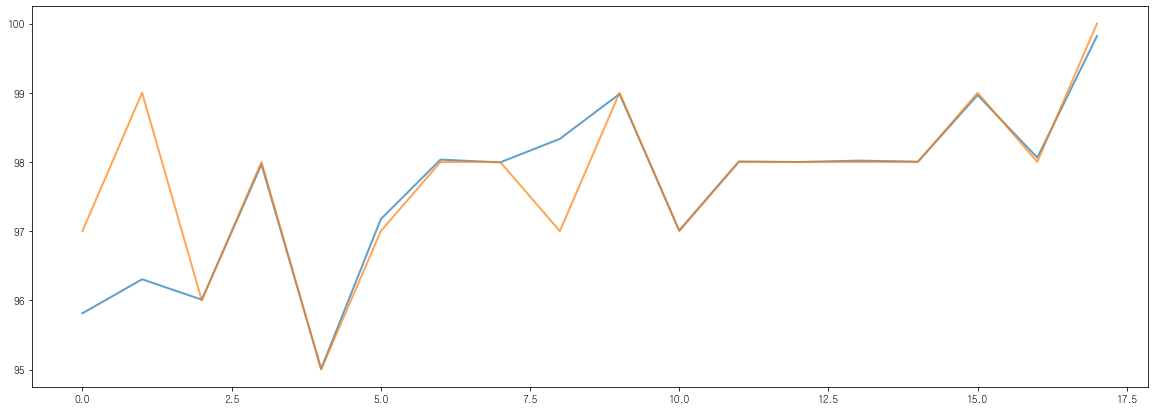

In [173]:
# 모델 성능 시각화

plt.pyplot.plot(model.predict(x_in),alpha = 0.7,linewidth = 2)
# 파란색 : 예측값
# 주황색 : 실제값
# 갈색 : 파란색과 주황색이 겹치는 부분
plt.pyplot.plot(x_out.values,alpha = 0.7,linewidth = 2)

### (3) Feature Importance

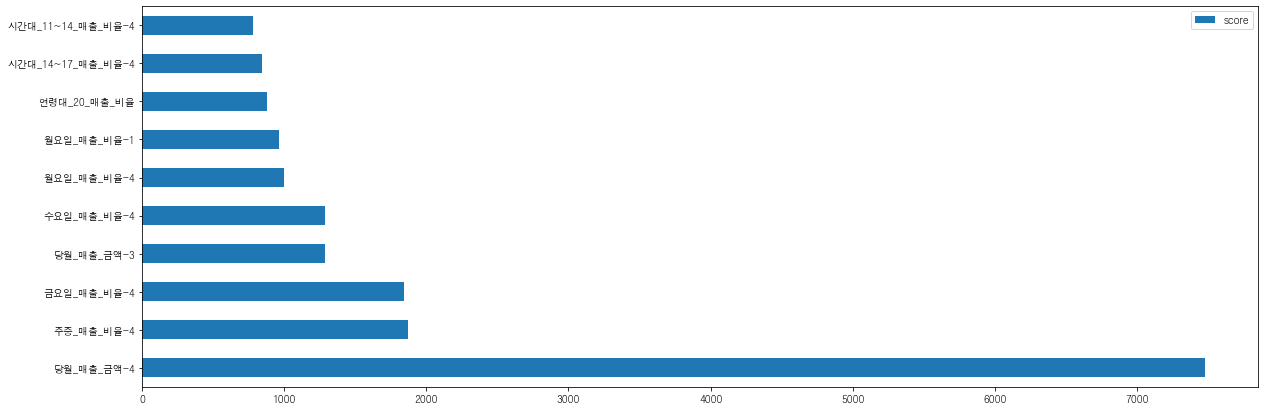

In [174]:
# 중요도 시각화

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
plt.rcParams["figure.figsize"] = (20,7)
data_50 = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data_50[:10].plot(kind='barh')